<font size=3>
This report will be divided into three parts. Firstly, the trading strategy will be illustrated, followed by the pseudo-code. The second part will be the code and the corresponding results. The last part will be the backtesting and some limitation related to the strategy.

Name: YU KONG

Student ID: k2106677

### [1] illustration of strategy  

> #### [1.1] The trading strategy explanation: 

<font size=3>
    
Firstly, the directional change (DC) is confirmed only after the price has changed by the amount of $\theta$ (the threshold value) from the peak (highest price in the current upward trend) or trough (lowest price in the current downward trend) to a lower price or a higher price. Before the confirmation point, the price movement is still in an OS (over shoot) event.  
    
Therefore, predicting the endpoint of the OS event is required. To predict the endpoint of the OS event, the scaling law is applied which is if the length of DC event is physical time t, then the length of OS event will be $2t$. Thus, the strategy I applied, two variables were generated: $r_d$ and $r_u$. The $r_d$ is the ratio of downward OS to the downward DC, and $r_u$ is corresponding to the ratio of the upward OS to upward DC. According to the scaling law, these two variables were assigned a value equal to 2.

Additionally, the trading window was not sufficiently defined by using only $r_u$ and $r_d$ due to the OS event may last longer or short than the average ratio described by these two variables. Hence, two investor-specified parameters used to define the trading window during OS events are created: $b_1$ and $b_2$. For instance, the [$b_1$,$b_2$] was set as [0.7, 1] and the OS event lasts from [10, 20], then the user-defined trading window will be [10, 17].


> #### The expression of trading window is displayed as follow:

**$t_0^U=t_1^{dc}+1+(t_1^{dc}-t_0^{dc}) \times r_u \times b_1$** 

**$t_1^U=t_1^{dc}+1+(t_1^{dc}-t_0^{dc}) \times r_u \times b_2$**

**$t_0^D=t_1^{dc}+1+(t_1^{dc}-t_0^{dc}) \times r_d \times b_1$**

**$t_0^D=t_1^{dc}+1+(t_1^{dc}-t_0^{dc}) \times r_d \times b_2$**
<font size=3>
    
    
    
where the start time of trading window is $t_0^U$ and the end time of trading window is $t_1^U$ in an upward trend, $t_0^D$ and $t_1^D$ are corresponding to the start and end times of a trading window in a downward trend. Moverover, $t_1^{dc}+1$ is the start time of a upward or downword OS event and $(t_1^{dc}-t_0^{dc}) \times r_u (r_d)$ is the duration of OS.


<font size=3>
    
Lastly, considering trading in the tick data, there can exist numerous of time points to trade, though the trading window has been defined. 

In this trading strategy, we try to buy at the price close to $P_{trough}$ and sell at the price which is close to $P_{peak}$. Hence, $b_3$ was generated which also is a user-defined variable rangeing within [0,1].

Therefore, buy when the $ price = P_{trough}+P_{trough} \times (1-b_3)$ and sell when the $ price = P_{peak} \times b_3$
    
Additionally, another investor-controlled parameter is Q which used to set the trading quantity.

<font size=3>
    
    
    
    
    
This coursework uses a multi-threshold DC trading strategy derived by Kampouridis and Otero (2017), this strategy combines the information collected at different thresholds to make a decision on a buy or sell then. Due to the thresholds will suggest different trading actions, weights are assigned to each threshold like: $W_1, W_2,...W_{N\theta}$. $N\theta$ is the total number of thresholds. 

If the sum of weights of all thresholds recommending a buy action larger than the sum of all weights of thresholds recommending a sell action, the buy action will be made, and vice versa. The investor will stay inactive when the price is not within the range defined by $b_3$ or the number of thresholds suggesting a buy or sell is smaller than zero.


Consequently, the trading quantity can be computed as well based on the different thresholds.


<font size=3>
    
$Q_{trade} = (1+\frac{N_{up}}{N_{\theta}})\times Q$

where $N_{up}$ denotes for the how many thresholds suggesting sell.

$Q_{trade} = (1+\frac{N_{down}}{N_{\theta}})\times Q$

where $N_{down}$ denotes for the how many thresholds suggesting buy.

> #### [1.2] The Pseudo-code for strategies are displayed as followed:

In [1]:
"""
importing packages for display the Screenshot:
"""
from IPython.display import Image
from IPython.core.display import HTML 
from IPython.display import display
# the Pseudo-code is compiled with Latex

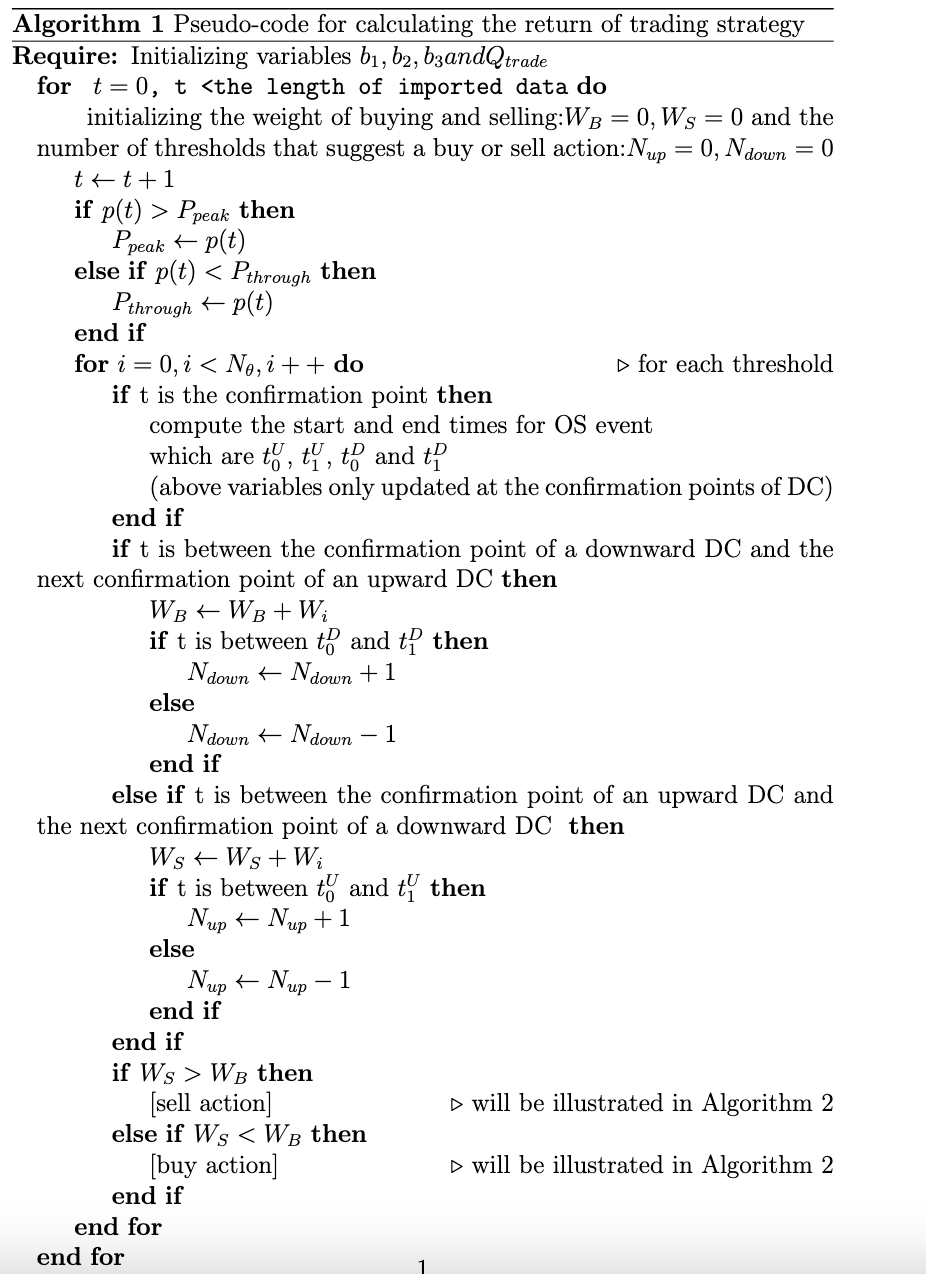

In [2]:
Image(filename='/Users/ambladeky/Desktop/alg_1.png',width=500, height=500) 

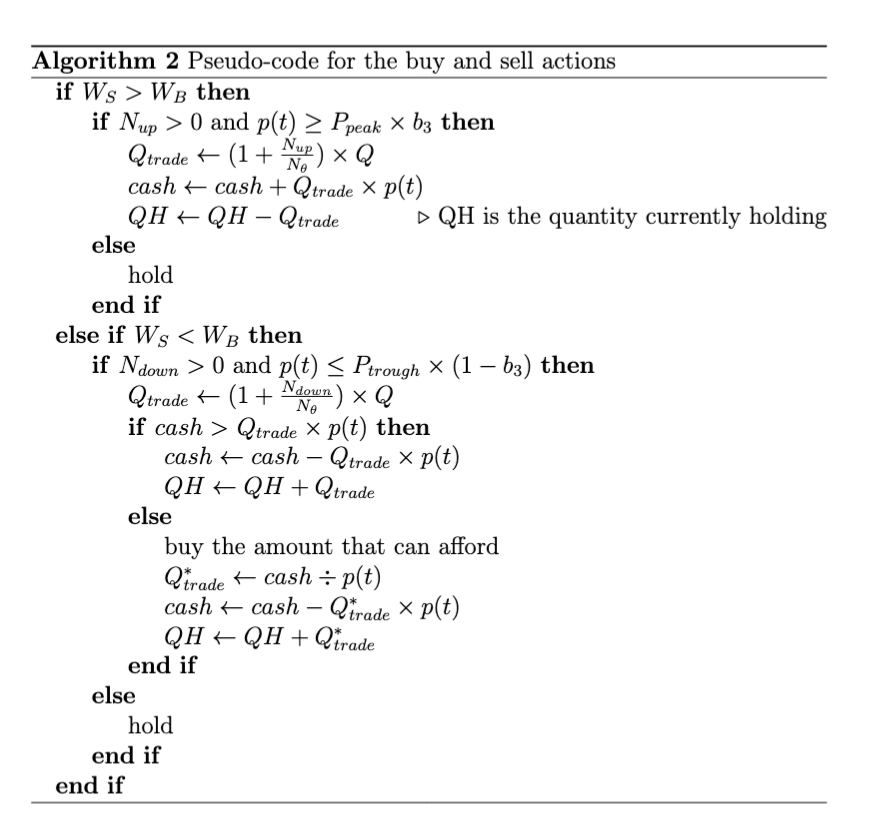

In [3]:
Image(filename='/Users/ambladeky/Desktop/alg_2.png',width=500, height=500) 

### [2] The code: 

<font size=3>
    
This section will have two components. Firstly, the function used to constructed the intrinsic time framework will be testified. Secondly, the whole strategy class will be delivered.

> #### [2.1] Construct the intrinsic time framework:

In [4]:
import numpy as np
import pandas as pd


# The code here will allow graphics to switch to dark mode:
import matplotlib.pyplot as plt

import matplotlib as mpl
from matplotlib import cycler
colors = cycler('color',
                ['#669FEE', '#66EE91', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('figure', facecolor='#313233')
plt.rc('axes', facecolor="#313233", edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors,
       labelcolor='gray')
plt.rc('grid', color='474A4A', linestyle='solid')
plt.rc('xtick', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('legend', facecolor="#313233", edgecolor="#313233")
plt.rc("text", color="#C9C9C9")

In [5]:
"""
Import the tick data, here use the forex-pair of EUR/USD during the period of December in 2021:
"""
df = pd.read_csv("/Users/ambladeky/Desktop/EURUSD_Tick_202112.csv")
df

,datestamp,bid,ask,volume
0,20211201 000000441,1.13318,1.13320,0
1,20211201 000000544,1.13319,1.13322,0
2,20211201 000002108,1.13318,1.13322,0
3,20211201 000002310,1.13320,1.13322,0
4,20211201 000002412,1.13324,1.13325,0
...,...,...,...,...
1048570,20211223 100104547,1.13126,1.13127,0
1048571,20211223 100104598,1.13123,1.13126,0
1048572,20211223 100104700,1.13121,1.13124,0
1048573,20211223 100104801,1.13120,1.13123,0


In [6]:
"""
Transfer the tick time into date object:
"""
from datetime import datetime
new_time=[]
for i in df.datestamp:
    dt=datetime.strptime(i,'%Y%m%d %H%M%S%f')
    new_time.append(dt)

In [7]:
"""
Setting the tick time as index and drop the original one
"""
df['ticktime']=pd.Series(new_time) 
df.drop('datestamp', inplace=True, axis=1)
df.set_index('ticktime',inplace=True)
df

,bid,ask,volume
ticktime,,,
2021-12-01 00:00:00.441,1.13318,1.13320,0
2021-12-01 00:00:00.544,1.13319,1.13322,0
2021-12-01 00:00:02.108,1.13318,1.13322,0
2021-12-01 00:00:02.310,1.13320,1.13322,0
2021-12-01 00:00:02.412,1.13324,1.13325,0
...,...,...,...
2021-12-23 10:01:04.547,1.13126,1.13127,0
2021-12-23 10:01:04.598,1.13123,1.13126,0
2021-12-23 10:01:04.700,1.13121,1.13124,0


In [8]:
# Generating the 'Trade_Price' computed as followed:
df['Trade_Price'] = (df['bid']+df['ask'])/2

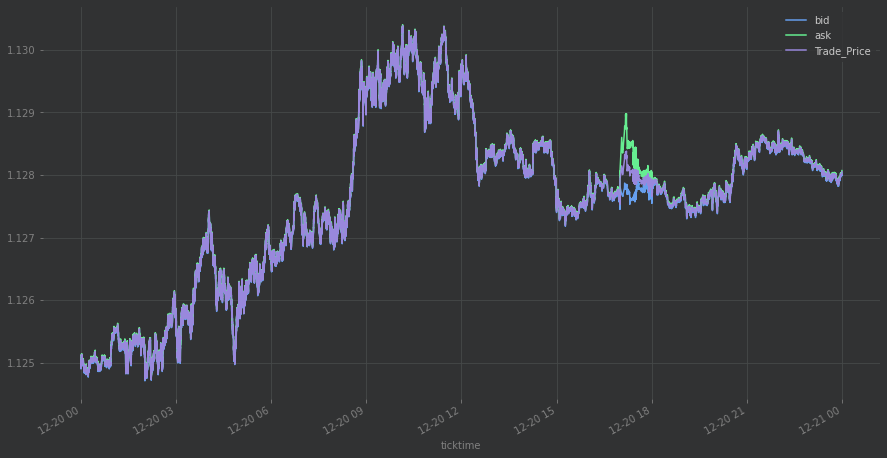

In [9]:
# Due to large mount of data, only selected 1 day as an example to draw and check the pattern:
df[["bid", "ask","Trade_Price"]].loc["2021-12-20"].plot(figsize=(15,8))

In [10]:
df["current"] = df["Trade_Price"].shift(1)
# only used: 2021-12-20 to check--> due to too large the whole dataset
df_1=df[["bid", "ask","Trade_Price","current"]].loc["2021-12-20"]
df_1

,bid,ask,Trade_Price,current
ticktime,,,,
2021-12-20 00:00:01.848,1.12492,1.12496,1.124940,1.124935
2021-12-20 00:00:02.052,1.12491,1.12493,1.124920,1.124940
2021-12-20 00:00:03.387,1.12490,1.12493,1.124915,1.124920
2021-12-20 00:00:03.934,1.12492,1.12493,1.124925,1.124915
2021-12-20 00:00:04.795,1.12490,1.12494,1.124920,1.124925
...,...,...,...,...
2021-12-20 23:59:47.446,1.12800,1.12804,1.128020,1.128015
2021-12-20 23:59:47.602,1.12799,1.12803,1.128010,1.128020
2021-12-20 23:59:59.043,1.12801,1.12805,1.128030,1.128010


In [13]:
dc_threshold = np.array([0.0001])
num_of_singledc = 1  # for the testing purpose, for now setting only 1.

event_dict = {}
def trade_dc_pattern(dc_threshold, num_of_singledc, df):
    # Initialization
    
    for dc in dc_threshold:  
        # default to be True:
        event_dict[dc] = [True]  # True -> Upward trend, False -> Downward trend
    b1 = 0  # b1 and b2 defines the trading window
    b2 = 1
    b3 = 1  
    # we want buy at the price close to the price trough P_trough 
    # and sell at the price close to the peak price P_peak
    ru = rd = 2  # predicts the length of OS
    ph = [df['Trade_Price'][0] for i in
          range(num_of_singledc)]  # the highest price in the current upward trend

    pl = [df['Trade_Price'][0] for i in
          range(num_of_singledc)]  # the lowest price in the current downward trend

    Ppeak = df['Trade_Price'][0]  # the highest recorded price
    Ptrough = df['Trade_Price'][0]  # the lowest recorded price

  
    tdc_0 = [0 for i in range(num_of_singledc)]  # directional change
    tdc_1 = [0 for i in range(num_of_singledc)]
    tos_0 = [0 for i in range(num_of_singledc)]  # overshoot event
    tos_1 = [0 for i in range(num_of_singledc)]
    tU_0 = [0 for i in range(num_of_singledc)]  # trading window
    tU_1 = [0 for i in range(num_of_singledc)]
    tD_0 = [0 for i in range(num_of_singledc)]
    tD_1 = [0 for i in range(num_of_singledc)]

    for idx in range(1, len(df)):
        Pc = df["Trade_Price"][idx]

        # 'Trade_Price' = self.data['Trade_Price'].shift(1)
        Trade_Price = df['current'][idx]  # current trade price

        if df["Trade_Price"][idx] > Ppeak:
            Ppeak = df["Trade_Price"][idx]
        elif df["Trade_Price"][idx] < Ptrough:
            Ptrough = df["Trade_Price"][idx]

        for dc_idx, dc in enumerate(dc_threshold):  
            if event_dict[dc][-1]:
                if df['Trade_Price'][idx] <= (ph[dc_idx] * (1 - dc)):
                    event_dict[dc].append(False)  # Confirmation point of downward DC

                    pl[dc_idx] = df['Trade_Price'][idx]
                    tdc_1[dc_idx] = idx
                    tos_0[dc_idx] = idx + 1
                    tD_0[dc_idx] = tdc_1[dc_idx] + 1 + (tdc_1[dc_idx] - tdc_0[
                        dc_idx]) * rd * b1  
                    # "(tdc_1[dc_idx] - tdc_0[dc_idx]) * rd" predicts the length of downward OS
                    tD_1[dc_idx] = tdc_1[dc_idx] + 1 + (
                            tdc_1[dc_idx] - tdc_0[dc_idx]) * rd * b2  # b1 and b2 defines the trading window
                else:
                    event_dict[dc].append(event_dict[dc][-1])  # No DC 
                    if ph[dc_idx] < df['Trade_Price'][idx]:
                        ph[dc_idx] = df['Trade_Price'][idx]
                        tdc_0[dc_idx] = idx
                        tos_1[dc_idx] = idx - 1
                    else:
                        try:
                            if event_dict[dc][-3] == False and event_dict[dc][
                                -2] == True:  # [False], [True], [True] -> now is right after the confirmation point, 
                        #yet it is not low enough to be directional change, but lower than or same as the confirmation point
                                tdc_0[dc_idx] = idx - 1
                        except:
                            pass
            else:  # Upnward trend
                if df['Trade_Price'][idx] >= (pl[dc_idx] * (1 + dc)):
                    event_dict[dc].append(True)  # Confirmation point of upward DC
                    try:
                        if event_dict[dc][-3] == True and event_dict[dc][
                            -2] == False:  # for the case [True], [False], [True] -> 2 consecutive confirmation points
                            tdc_0[dc_idx] = idx - 1
                    except:
                        pass
                    ph[dc_idx] = df['Trade_Price'][idx]
                    tdc_1[dc_idx] = idx
                    tos_0[dc_idx] = idx + 1
                    tU_0[dc_idx] = tdc_1[dc_idx] + 1 + (tdc_1[dc_idx] - tdc_0[
                        dc_idx]) * ru * b1  # "(tdc_1[dc_idx] - tdc_0[dc_idx]) * rd" predicts the length of upward OS
                    tU_1[dc_idx] = tdc_1[dc_idx] + 1 + (
                            tdc_1[dc_idx] - tdc_0[dc_idx]) * ru * b2  # b1 and b2 defines the trading window
                else:
                    event_dict[dc].append(event_dict[dc][-1])  # No DC
                    if pl[dc_idx] > df['Trade_Price'][idx]:
                        pl[dc_idx] = df['Trade_Price'][idx]
                        tdc_0[dc_idx] = idx
                        tos_1[dc_idx] = idx - 1
                    else:
                        try:
                            if event_dict[dc][-3] == True and event_dict[dc][
                                -2] == False:  
            # [True], [False], [False] -> the current time point is right after the confirmation point, 
            # yet it is not high enough to be directional change, but higher than or same as the confirmation point
                                tdc_0[dc_idx] = idx - 1
                        except:
                            pass
    
    e_s=pd.Series(event_dict)
#     print()
    return e_s

In [14]:
trade_dc_pattern(dc_threshold,num_of_singledc,df_1)

0.0001    [True, True, True, True, True, True, True, Tru...
dtype: object

In [15]:
"""
Get the events from dictionary and merge it with the tick data dataframe:
"""
event=event_dict.get(0.0001)

ev_df=pd.DataFrame(event,index=df_1.index)

ev_df.rename(columns = {0:'event'}, inplace = True)

new_df=pd.merge(df_1,ev_df ,on='ticktime')
new_df

,bid,ask,Trade_Price,current,event
ticktime,,,,,
2021-12-20 00:00:01.848,1.12492,1.12496,1.124940,1.124935,True
2021-12-20 00:00:02.052,1.12491,1.12493,1.124920,1.124940,True
2021-12-20 00:00:03.387,1.12490,1.12493,1.124915,1.124920,True
2021-12-20 00:00:03.934,1.12492,1.12493,1.124925,1.124915,True
2021-12-20 00:00:04.795,1.12490,1.12494,1.124920,1.124925,True
...,...,...,...,...,...
2021-12-20 23:59:47.446,1.12800,1.12804,1.128020,1.128015,True
2021-12-20 23:59:47.602,1.12799,1.12803,1.128010,1.128020,True
2021-12-20 23:59:59.043,1.12801,1.12805,1.128030,1.128010,True


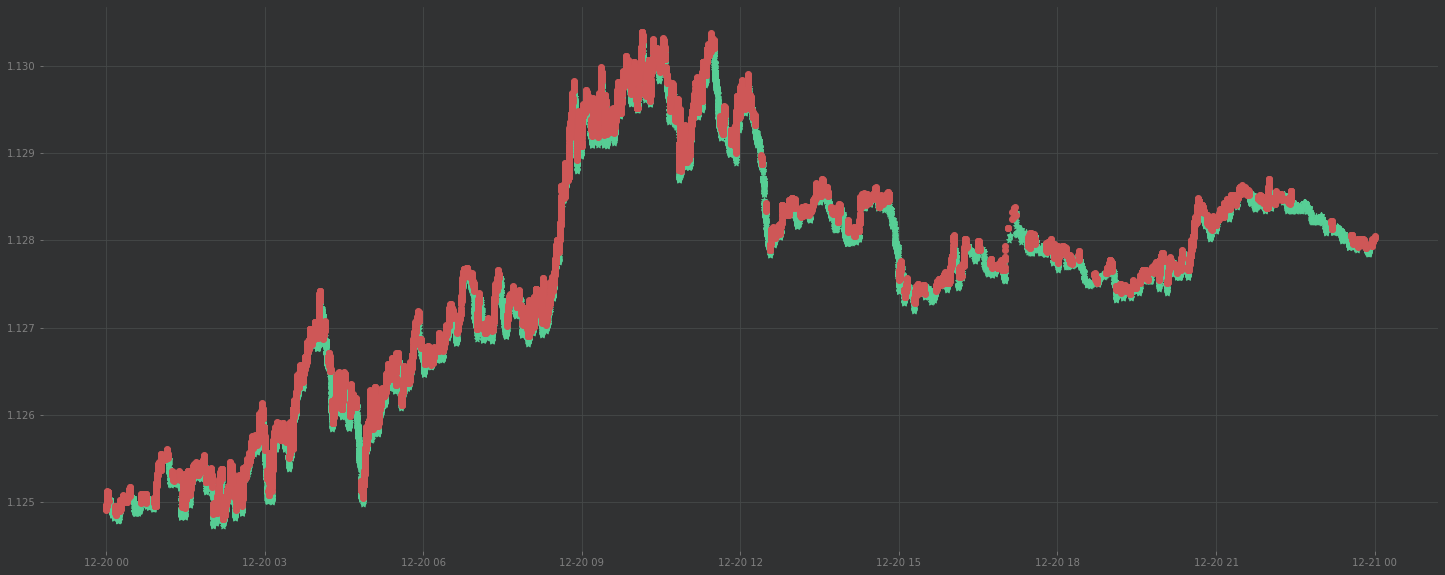

In [38]:
idxofshort = new_df.loc[new_df["event"] == True].index

idxoflong = new_df.loc[new_df["event"] == False].index

plt.figure(figsize=(25,10))

# the long position is in green
plt.scatter(new_df.loc[idxoflong].index, new_df.loc[idxoflong]["Trade_Price"], color= "#57CE95", marker="*")
plt.scatter(new_df.loc[idxofshort].index, new_df.loc[idxofshort]["Trade_Price"], color= "#CE5757", marker="o")

> #### [2.2] The whole strategy:

<font size=3>
    
The default setting are: 

[1] The initial cash hold by investor = 2,000

[2] Default currency unit is USD

In [25]:
import numpy as np
import pandas as pd
import os
import sys
import math
import random

np.random.seed(20)

class DC_strategy:

    def __init__(self, num_of_dc, forex_pair, budget, dollar): 
        self.num_of_dc = num_of_dc # number of DC thresholds
        self.dc_interval = 1
        self.forex_pair = forex_pair
        self.budget = budget
        self.cash = budget # the amount of cash currently holding
        self.QH = 0 # the amount/quantity currently holding
        self.dollar = dollar # currency

        self.generate_threshold() # can randomly generate DC thresholds or use the fixed 2 thresholds
        self.load_forex_pair()
        self.trade_dc_pattern() 

    def generate_threshold(self):

        threshold_interval = [i / 100 for i in range(self.num_of_dc + 1)]
        threshold = []
        for i in range(1, self.num_of_dc + 1):
            threshold.append(random.uniform(threshold_interval[i-1], threshold_interval[i]))
        self.dc_threshold = np.array(threshold)    

        FIXED =True #False#True
        if FIXED:
            self.dc_threshold = np.array([0.0001, 0.00013])
        print(self.dc_threshold)
        print("threshold value: ",end='')
        for i in self.dc_threshold:
            print("{:0.4f}%, ".format(i * 100),end='')
        print()
        
        #---------end of setting threshold-----------------------#
        

    def load_forex_pair(self): 
        data_path = "/Users/ambladeky/Desktop/" + str(self.forex_pair) + ".csv"
        self.data = pd.DataFrame(pd.read_csv(data_path))
        # The trade price：is (bid_price+ask_price)/2
        self.data['Trade_Price'] = (self.data['bid']+self.data['ask'])/2
        self.data["current"] = self.data["Trade_Price"].shift(1)
        self.data = self.data[::self.dc_interval] # Change the observation time interval. 
        self.data.reset_index(drop = True, inplace = True)
        #debug:
        print(self.data)

         #---------end of loading data-----------------------#
            
            
    def trade_dc_pattern(self):
        # Initialization
        event_dict = {} 
        for dc in self.dc_threshold:
            event_dict[dc] = [True] # True -> Upward trend, False -> Downward trend
        b1 = 0.8 # b1 and b2 defines the trading window
        b2 = 1
        b3 = 0.9 
        # we want buy at the price close to the price trough P_trough and sell at the price close to the peak price P_peak 
        Q = 1 # Q controls the trading quantity
        ru = rd = 2 # predicts the length of OS 
        Wi = [1 for i in range(self.num_of_dc)] # Weight of each threshold = 1, for simplicity
        
        ph = [self.data['Trade_Price'][0] for i in range(self.num_of_dc)] # the highest price in the current upward trend
        pl = [self.data['Trade_Price'][0] for i in range(self.num_of_dc)] # the lowest price in the current downward trend
        Ppeak = self.data['Trade_Price'][0] # the highest recorded price  
        Ptrough = self.data['Trade_Price'][0] # the lowest recorded price
        tdc_0 = [0 for i in range(self.num_of_dc)] # directional change 
        tdc_1 = [0 for i in range(self.num_of_dc)]
        tos_0 = [0 for i in range(self.num_of_dc)] # overshoot event
        tos_1 = [0 for i in range(self.num_of_dc)]
        tU_0 = [0 for i in range(self.num_of_dc)] # trading window
        tU_1 = [0 for i in range(self.num_of_dc)]
        tD_0 = [0 for i in range(self.num_of_dc)]
        tD_1 = [0 for i in range(self.num_of_dc)] 

        for idx in range(1, len(self.data)): 
            WB = 0 # Weight of Buy
            WS = 0 # Weight of Sell
            Nup = 0 # the number of thresholds that recommending a sell action
            Ndown = 0 # the number of thresholds that recommending a buy action
            
            
            Pc = self.data["current"][idx] # current price 
            Trade_Price = self.data['Trade_Price'][idx] # current trade price
            
            if self.data["Trade_Price"][idx] > Ppeak:
                Ppeak = self.data["Trade_Price"][idx]
            elif self.data["Trade_Price"][idx] < Ptrough:
                Ptrough = self.data["Trade_Price"][idx]
                
            for dc_idx, dc in enumerate(self.dc_threshold): 
                if event_dict[dc][-1]: 
                    if self.data['Trade_Price'][idx] <= (ph[dc_idx] * (1 - dc)):
                        event_dict[dc].append(False) # Confirmation point of downward DC
                        try: #error when t = 1
                            if event_dict[dc][-3] == False and event_dict[dc][-2] == True: 
                                # for the case [False], [True], [False] -> 2 consecutive confirmation points
                                tdc_0[dc_idx] = idx - 1
                        except:
                            pass 
                        pl[dc_idx] = self.data['Trade_Price'][idx]
                        tdc_1[dc_idx] = idx
                        tos_0[dc_idx] = idx + 1
                        tD_0[dc_idx] = tdc_1[dc_idx] + 1 + (tdc_1[dc_idx] - tdc_0[dc_idx]) * rd * b1 
                        # "(tdc_1[dc_idx] - tdc_0[dc_idx]) * rd" predicts the length of downward OS 
                        tD_1[dc_idx] = tdc_1[dc_idx] + 1 + (tdc_1[dc_idx] - tdc_0[dc_idx]) * rd * b2 
                        # b1 and b2 defines the trading window
                    else:
                        event_dict[dc].append(event_dict[dc][-1]) # No DC 
                        if ph[dc_idx] < self.data['Trade_Price'][idx]:
                            ph[dc_idx] = self.data['Trade_Price'][idx]
                            tdc_0[dc_idx] = idx
                            tos_1[dc_idx] = idx - 1
                        else:
                            try:
                                if event_dict[dc][-3] == False and event_dict[dc][-2] == True: 
                            # [False], [True], [True] -> the current time point is right after the confirmation point, 
                            #yet its price is not low enough to be directional change, but lower than or same as the confirmation point
                                    tdc_0[dc_idx] = idx - 1 
                            except:
                                pass  
                else: # False -> Downward trend
                    if self.data['Trade_Price'][idx] >= (pl[dc_idx] * (1 + dc)):
                        event_dict[dc].append(True)  # Confirmation point of upward DC
                        try:
                            if event_dict[dc][-3] == True and event_dict[dc][-2] == False: 
                                # for the case [True], [False], [True] -> 2 consecutive confirmation points
                                tdc_0[dc_idx] = idx - 1
                        except:
                            pass
                        ph[dc_idx] = self.data['Trade_Price'][idx]
                        tdc_1[dc_idx] = idx
                        tos_0[dc_idx] = idx + 1
                        tU_0[dc_idx] = tdc_1[dc_idx] + 1 + (tdc_1[dc_idx] - tdc_0[dc_idx]) * ru * b1 
                        # "(tdc_1[dc_idx] - tdc_0[dc_idx]) * rd" predicts the length of upward OS 
                        tU_1[dc_idx] = tdc_1[dc_idx] + 1 + (tdc_1[dc_idx] - tdc_0[dc_idx]) * ru * b2 
                        # b1 and b2 defines the trading window
                    else: 
                        event_dict[dc].append(event_dict[dc][-1])  # No DC 
                        if pl[dc_idx] > self.data['Trade_Price'][idx]:
                            pl[dc_idx] = self.data['Trade_Price'][idx]
                            tdc_0[dc_idx] = idx
                            tos_1[dc_idx] = idx - 1
                        else:
                            try:
                                if event_dict[dc][-3] == True and event_dict[dc][-2] == False: 
            # [True], [False], [False] -> the current time point is right after the confirmation point, 
            # yet its price is not high enough to be directional change, but higher than or same as the confirmation point
                                    tdc_0[dc_idx] = idx - 1
                            except:
                                pass
                # trade
                if event_dict[dc][-1] == False and event_dict[dc][-2] == False: 
                    # if event is downward trend and the current time point is not confirmation point
                    WB = WB + Wi[dc_idx] 
                    if tD_0[dc_idx] <= idx and idx <= tD_1[dc_idx]: 
                    # if the current time point is within the trading window
                        Ndown += 1
                    else:
                        Ndown -= 1
                        
                if event_dict[dc][-1] == True and event_dict[dc][-2] == True: 
                    # if event is upward trend and the current time point is not confirmation point
                    WS = WS + Wi[dc_idx] 
                    if tU_0[dc_idx] <= idx and idx <= tU_1[dc_idx]: 
                        # if the current time point is within the trading window
                        Nup += 1
                    else:
                        Nup -= 1
                        
            if WS > WB:
                self.trade_action("sell", b3, Nup, Ppeak, Pc, Trade_Price, Q) # sell
            elif WS < WB:
                self.trade_action("buy", b3, Ndown, Ptrough, Pc, Trade_Price, Q) # buy

        Wealth = self.cash + self.QH * Pc
        Return = 100 * (Wealth - self.budget) / self.budget # calculate return
        print(Return)
        print("Wealth = {:0.4f} ".format(Wealth) + self.dollar + ", Return = {:0.4f}".format(Return) + "%")
        #debug:
#         print(event_dict)
        
        
        
    def trade_action(self, action, b3, N, P, Pc, Trade_Price, Q): # performs the buy and sell actions
        N0 = self.num_of_dc #N0 is the total number of thresholds
        if action == "sell":
            Nup = N
            if Nup > 0 and Pc >= P * b3: # sell
                Qtrade = math.floor((1 + Nup / N0) * Q)
                if self.QH > Qtrade:
                    self.cash = self.cash + Qtrade * Trade_Price
                    self.QH = self.QH - Qtrade
                else:
                    self.cash = self.cash + self.QH * Trade_Price
                    self.QH = 0
            else:
                pass #will hold
            
        elif action == "buy":
            Ndown = N
            if Ndown > 0 and Pc <= P + (P * (1 - b3)): # buy
                Qtrade = math.floor((1 + Ndown / N0) * Q)
                if self.cash > Qtrade * Trade_Price:
                    self.cash = self.cash - Qtrade * Trade_Price
                    self.QH = self.QH + Qtrade
                else:
                    Qtrade_m = self.cash // Trade_Price 
                    self.cash = self.cash - Qtrade_m * Trade_Price
                    self.QH = self.QH + Qtrade_m
            else:
                pass # will hold
        
output = DC_strategy(2, "EURUSD_Tick_202112", 2000, "USD") 

[0.0001  0.00013]
threshold value: 0.0100%, 0.0130%, 
                  datestamp      bid      ask  volume  Trade_Price   current
0        20211201 000000441  1.13318  1.13320       0     1.133190       NaN
1        20211201 000000544  1.13319  1.13322       0     1.133205  1.133190
2        20211201 000002108  1.13318  1.13322       0     1.133200  1.133205
3        20211201 000002310  1.13320  1.13322       0     1.133210  1.133200
4        20211201 000002412  1.13324  1.13325       0     1.133245  1.133210
...                     ...      ...      ...     ...          ...       ...
1048570  20211223 100104547  1.13126  1.13127       0     1.131265  1.131285
1048571  20211223 100104598  1.13123  1.13126       0     1.131245  1.131265
1048572  20211223 100104700  1.13121  1.13124       0     1.131225  1.131245
1048573  20211223 100104801  1.13120  1.13123       0     1.131215  1.131225
1048574  20211223 100105206  1.13120  1.13124       0     1.131220  1.131215

[1048575 rows x 6 col

### [3] Backtest 

<font size=3>
    
The dataset used for backtesting is the same forex-pair but during the period of Junuary and February in 2022.

> ##### Backtesting during the period of February in 2022

In [45]:
np.random.seed(20)

class DC_strategy:

    def __init__(self, num_of_dc, forex_pair, budget, dollar): 
        self.num_of_dc = num_of_dc # number of DC thresholds
        self.dc_interval = 1
        self.forex_pair = forex_pair
        self.budget = budget
        self.cash = budget # the amount of cash we are currently holding
        self.QH = 0 # the amount/quantity currently holding
        self.dollar = dollar # currency

        self.generate_threshold() # can randomly generate DC thresholds or use the fixed 2 thresholds
        self.load_forex_pair()
        self.trade_dc_pattern() 

    def generate_threshold(self):

        threshold_interval = [i / 100 for i in range(self.num_of_dc + 1)]
        threshold = []
        for i in range(1, self.num_of_dc + 1):
            threshold.append(random.uniform(threshold_interval[i-1], threshold_interval[i]))
        self.dc_threshold = np.array(threshold)    

        FIXED =True #False#True
        if FIXED:
            self.dc_threshold = np.array([0.0001, 0.00013])
        print(self.dc_threshold)
        print("threshold value: ",end='')
        for i in self.dc_threshold:
            print("{:0.4f}%, ".format(i * 100),end='')
        print()
        
        #---------end of setting threshold-----------------------#
        

    def load_forex_pair(self): 
        data_path = "/Users/ambladeky/Desktop/" + str(self.forex_pair) + ".csv"
        self.data = pd.DataFrame(pd.read_csv(data_path))
        # The trade price：is (bid_price+ask_price)/2
        self.data['Trade_Price'] = (self.data['bid']+self.data['ask'])/2
        self.data["current"] = self.data["Trade_Price"].shift(1)
        self.data = self.data[::self.dc_interval] # Change the observation time interval. 
        self.data.reset_index(drop = True, inplace = True)
        #debug:
        print(self.data)

         #---------end of loading data-----------------------#
            
            
    def trade_dc_pattern(self):
        # Initialization
        event_dict = {} 
        for dc in self.dc_threshold:
            event_dict[dc] = [True] # True -> Upward trend, False -> Downward trend
        b1 = 0.8 # b1 and b2 defines the trading window
        b2 = 1
        b3 = 0.9 
        # we want buy at the price close to the price trough P_trough and sell at the price close to the peak price P_peak 
        Q = 1 # Q controls the trading quantity
        ru = rd = 2 # predicts the length of OS 
        Wi = [1 for i in range(self.num_of_dc)] # Weight of each threshold = 1, for simplicity
        
        ph = [self.data['Trade_Price'][0] for i in range(self.num_of_dc)] # the highest price in the current upward trend
        pl = [self.data['Trade_Price'][0] for i in range(self.num_of_dc)] # the lowest price in the current downward trend
        Ppeak = self.data['Trade_Price'][0] # the highest recorded price  
        Ptrough = self.data['Trade_Price'][0] # the lowest recorded price
        tdc_0 = [0 for i in range(self.num_of_dc)] # directional change 
        tdc_1 = [0 for i in range(self.num_of_dc)]
        tos_0 = [0 for i in range(self.num_of_dc)] # overshoot event
        tos_1 = [0 for i in range(self.num_of_dc)]
        tU_0 = [0 for i in range(self.num_of_dc)] # trading window
        tU_1 = [0 for i in range(self.num_of_dc)]
        tD_0 = [0 for i in range(self.num_of_dc)]
        tD_1 = [0 for i in range(self.num_of_dc)] 

        for idx in range(1, len(self.data)): 
            WB = 0 # Weight of Buy
            WS = 0 # Weight of Sell
            Nup = 0 # the number of thresholds that recommending a sell action
            Ndown = 0 # the number of thresholds that recommending a buy action
            
            
            Pc = self.data["current"][idx] # current price 
            Trade_Price = self.data['Trade_Price'][idx] # current trade price
            
            if self.data["Trade_Price"][idx] > Ppeak:
                Ppeak = self.data["Trade_Price"][idx]
            elif self.data["Trade_Price"][idx] < Ptrough:
                Ptrough = self.data["Trade_Price"][idx]
                
            for dc_idx, dc in enumerate(self.dc_threshold): 
                if event_dict[dc][-1]: 
                    if self.data['Trade_Price'][idx] <= (ph[dc_idx] * (1 - dc)):
                        event_dict[dc].append(False) # Confirmation point of downward DC
                        try: #error when t = 1
                            if event_dict[dc][-3] == False and event_dict[dc][-2] == True: 
                                # for the case [False], [True], [False] -> 2 consecutive confirmation points
                                tdc_0[dc_idx] = idx - 1
                        except:
                            pass 
                        pl[dc_idx] = self.data['Trade_Price'][idx]
                        tdc_1[dc_idx] = idx
                        tos_0[dc_idx] = idx + 1
                        tD_0[dc_idx] = tdc_1[dc_idx] + 1 + (tdc_1[dc_idx] - tdc_0[dc_idx]) * rd * b1 
                        # "(tdc_1[dc_idx] - tdc_0[dc_idx]) * rd" predicts the length of downward OS 
                        tD_1[dc_idx] = tdc_1[dc_idx] + 1 + (tdc_1[dc_idx] - tdc_0[dc_idx]) * rd * b2 
                        # b1 and b2 defines the trading window
                    else:
                        event_dict[dc].append(event_dict[dc][-1]) # No DC 
                        if ph[dc_idx] < self.data['Trade_Price'][idx]:
                            ph[dc_idx] = self.data['Trade_Price'][idx]
                            tdc_0[dc_idx] = idx
                            tos_1[dc_idx] = idx - 1
                        else:
                            try:
                                if event_dict[dc][-3] == False and event_dict[dc][-2] == True: 
                    # [False], [True], [True] -> the current time point is right after the confirmation point, 
                    #yet its price is not low enough to be directional change, but lower than or same as the confirmation point
                                    tdc_0[dc_idx] = idx - 1 
                            except:
                                pass  
                else: # False -> Downward trend
                    if self.data['Trade_Price'][idx] >= (pl[dc_idx] * (1 + dc)):
                        event_dict[dc].append(True)  # Confirmation point of upward DC
                        try:
                            if event_dict[dc][-3] == True and event_dict[dc][-2] == False: # for the case [True], [False], [True] -> 2 consecutive confirmation points
                                tdc_0[dc_idx] = idx - 1
                        except:
                            pass
                        ph[dc_idx] = self.data['Trade_Price'][idx]
                        tdc_1[dc_idx] = idx
                        tos_0[dc_idx] = idx + 1
                        tU_0[dc_idx] = tdc_1[dc_idx] + 1 + (tdc_1[dc_idx] - tdc_0[dc_idx]) * ru * b1 
                        # "(tdc_1[dc_idx] - tdc_0[dc_idx]) * rd" predicts the length of upward OS 
                        tU_1[dc_idx] = tdc_1[dc_idx] + 1 + (tdc_1[dc_idx] - tdc_0[dc_idx]) * ru * b2 
                        # b1 and b2 defines the trading window
                    else: 
                        event_dict[dc].append(event_dict[dc][-1])  # No DC 
                        if pl[dc_idx] > self.data['Trade_Price'][idx]:
                            pl[dc_idx] = self.data['Trade_Price'][idx]
                            tdc_0[dc_idx] = idx
                            tos_1[dc_idx] = idx - 1
                        else:
                            try:
                                if event_dict[dc][-3] == True and event_dict[dc][-2] == False: 
                    # [True], [False], [False] -> the current time point is right after the confirmation point, 
                    # yet its price is not high enough to be directional change, but higher than or same as the confirmation point
                                    tdc_0[dc_idx] = idx - 1
                            except:
                                pass
                # trade
                if event_dict[dc][-1] == False and event_dict[dc][-2] == False: 
                    # if event is downward trend and the current time point is not confirmation point
                    WB = WB + Wi[dc_idx] 
                    if tD_0[dc_idx] <= idx and idx <= tD_1[dc_idx]: 
                    # if the current time point is within the trading window
                        Ndown += 1
                    else:
                        Ndown -= 1
                        
                if event_dict[dc][-1] == True and event_dict[dc][-2] == True: 
                    # if event is upward trend and the current time point is not confirmation point
                    WS = WS + Wi[dc_idx] 
                    if tU_0[dc_idx] <= idx and idx <= tU_1[dc_idx]: 
                        # if the current time point is within the trading window
                        Nup += 1
                    else:
                        Nup -= 1
                        
            if WS > WB:
                self.trade_action("sell", b3, Nup, Ppeak, Pc, Trade_Price, Q) # sell
            elif WS < WB:
                self.trade_action("buy", b3, Ndown, Ptrough, Pc, Trade_Price, Q) # buy

        Wealth = self.cash + self.QH * Pc
        Return = 100 * (Wealth - self.budget) / self.budget # calculate return
        print(Return)
        print("Wealth = {:0.4f} ".format(Wealth) + self.dollar + ", Return = {:0.4f}".format(Return) + "%")
        #debug:
#         print(event_dict)
        
        
        
    def trade_action(self, action, b3, N, P, Pc, Trade_Price, Q): # performs the buy and sell actions
        N0 = self.num_of_dc #N0 is the total number of thresholds
        if action == "sell":
            Nup = N
            if Nup > 0 and Pc >= P * b3: # sell
                Qtrade = math.floor((1 + Nup / N0) * Q)
                if self.QH > Qtrade:
                    self.cash = self.cash + Qtrade * Trade_Price
                    self.QH = self.QH - Qtrade
                else:
                    self.cash = self.cash + self.QH * Trade_Price
                    self.QH = 0
            else:
                pass #will hold
            
        elif action == "buy":
            Ndown = N
            if Ndown > 0 and Pc <= P + (P * (1 - b3)): # buy
                Qtrade = math.floor((1 + Ndown / N0) * Q)
                if self.cash > Qtrade * Trade_Price:
                    self.cash = self.cash - Qtrade * Trade_Price
                    self.QH = self.QH + Qtrade
                else:
                    Qtrade_m = self.cash // Trade_Price 
                    self.cash = self.cash - Qtrade_m * Trade_Price
                    self.QH = self.QH + Qtrade_m
            else:
                pass # will hold
        
output = DC_strategy(2, "EURUSD_T_202202", 2000, "USD") 

[0.0001  0.00013]
threshold value: 0.0100%, 0.0130%, 
                  datestamp      bid      ask  volume  Trade_Price   current
0        20220201 000006460  1.12430  1.12433       0     1.124315       NaN
1        20220201 000007663  1.12430  1.12434       0     1.124320  1.124315
2        20220201 000008739  1.12430  1.12433       0     1.124315  1.124320
3        20220201 000018681  1.12426  1.12429       0     1.124275  1.124315
4        20220201 000018732  1.12428  1.12432       0     1.124300  1.124275
...                     ...      ...      ...     ...          ...       ...
1048570  20220218 080441679  1.13566  1.13568       0     1.135670  1.135665
1048571  20220218 080441781  1.13566  1.13569       0     1.135675  1.135670
1048572  20220218 080444295  1.13568  1.13570       0     1.135690  1.135675
1048573  20220218 080444397  1.13570  1.13573       0     1.135715  1.135690
1048574  20220218 080445252  1.13567  1.13570       0     1.135685  1.135715

[1048575 rows x 6 col

> ##### Backtesting during the period of Junuary in 2022:

In [29]:
np.random.seed(20)

class DC_strategy:

    def __init__(self, num_of_dc, forex_pair, budget, dollar): 
        self.num_of_dc = num_of_dc # number of DC thresholds
        self.dc_interval = 1
        self.forex_pair = forex_pair
        self.budget = budget
        self.cash = budget # the amount of cash we are currently holding
        self.QH = 0 # the amount/quantity currently holding
        self.dollar = dollar # currency

        self.generate_threshold() # can randomly generate DC thresholds or use the fixed 2 thresholds
        self.load_forex_pair()
        self.trade_dc_pattern() 

    def generate_threshold(self):

        threshold_interval = [i / 100 for i in range(self.num_of_dc + 1)]
        threshold = []
        for i in range(1, self.num_of_dc + 1):
            threshold.append(random.uniform(threshold_interval[i-1], threshold_interval[i]))
        self.dc_threshold = np.array(threshold)    

        FIXED =True #False#True
        if FIXED:
            self.dc_threshold = np.array([0.0001, 0.00013])
        print(self.dc_threshold)
        print("threshold value: ",end='')
        for i in self.dc_threshold:
            print("{:0.4f}%, ".format(i * 100),end='')
        print()
        
        #---------end of setting threshold-----------------------#
        

    def load_forex_pair(self): 
        data_path = "/Users/ambladeky/Desktop/" + str(self.forex_pair) + ".csv"
        self.data = pd.DataFrame(pd.read_csv(data_path))
        # The trade price：is (bid_price+ask_price)/2
        self.data['Trade_Price'] = (self.data['bid']+self.data['ask'])/2
        self.data["current"] = self.data["Trade_Price"].shift(1)
        self.data = self.data[::self.dc_interval] # Change the observation time interval. 
        self.data.reset_index(drop = True, inplace = True)
        #debug:
        print(self.data)

         #---------end of loading data-----------------------#
            
            
    def trade_dc_pattern(self):
        # Initialization
        event_dict = {} 
        for dc in self.dc_threshold:
            event_dict[dc] = [True] # True -> Upward trend, False -> Downward trend
        b1 = 0.8 # b1 and b2 defines the trading window
        b2 = 1
        b3 = 0.9 
        # we want buy at the price close to the price trough P_trough and sell at the price close to the peak price P_peak 
        Q = 1 # Q controls the trading quantity
        ru = rd = 2 # predicts the length of OS 
        Wi = [1 for i in range(self.num_of_dc)] # Weight of each threshold = 1, for simplicity
        
        ph = [self.data['Trade_Price'][0] for i in range(self.num_of_dc)] # the highest price in the current upward trend
        pl = [self.data['Trade_Price'][0] for i in range(self.num_of_dc)] # the lowest price in the current downward trend
        Ppeak = self.data['Trade_Price'][0] # the highest recorded price  
        Ptrough = self.data['Trade_Price'][0] # the lowest recorded price
        tdc_0 = [0 for i in range(self.num_of_dc)] # directional change 
        tdc_1 = [0 for i in range(self.num_of_dc)]
        tos_0 = [0 for i in range(self.num_of_dc)] # overshoot event
        tos_1 = [0 for i in range(self.num_of_dc)]
        tU_0 = [0 for i in range(self.num_of_dc)] # trading window
        tU_1 = [0 for i in range(self.num_of_dc)]
        tD_0 = [0 for i in range(self.num_of_dc)]
        tD_1 = [0 for i in range(self.num_of_dc)] 

        for idx in range(1, len(self.data)): 
            WB = 0 # Weight of Buy
            WS = 0 # Weight of Sell
            Nup = 0 # the number of thresholds that recommending a sell action
            Ndown = 0 # the number of thresholds that recommending a buy action
            
            
            Pc = self.data["current"][idx] # current price 
            Trade_Price = self.data['Trade_Price'][idx] # current trade price
            
            if self.data["Trade_Price"][idx] > Ppeak:
                Ppeak = self.data["Trade_Price"][idx]
            elif self.data["Trade_Price"][idx] < Ptrough:
                Ptrough = self.data["Trade_Price"][idx]
                
            for dc_idx, dc in enumerate(self.dc_threshold): 
                if event_dict[dc][-1]: 
                    if self.data['Trade_Price'][idx] <= (ph[dc_idx] * (1 - dc)):
                        event_dict[dc].append(False) # Confirmation point of downward DC
                        try: #error when t = 1
                            if event_dict[dc][-3] == False and event_dict[dc][-2] == True:
                                # for the case [False], [True], [False] -> 2 consecutive confirmation points
                                tdc_0[dc_idx] = idx - 1
                        except:
                            pass 
                        pl[dc_idx] = self.data['Trade_Price'][idx]
                        tdc_1[dc_idx] = idx
                        tos_0[dc_idx] = idx + 1
                        tD_0[dc_idx] = tdc_1[dc_idx] + 1 + (tdc_1[dc_idx] - tdc_0[dc_idx]) * rd * b1 
                        # "(tdc_1[dc_idx] - tdc_0[dc_idx]) * rd" predicts the length of downward OS 
                        tD_1[dc_idx] = tdc_1[dc_idx] + 1 + (tdc_1[dc_idx] - tdc_0[dc_idx]) * rd * b2 
                        # b1 and b2 defines the trading window
                    else:
                        event_dict[dc].append(event_dict[dc][-1]) # No DC 
                        if ph[dc_idx] < self.data['Trade_Price'][idx]:
                            ph[dc_idx] = self.data['Trade_Price'][idx]
                            tdc_0[dc_idx] = idx
                            tos_1[dc_idx] = idx - 1
                        else:
                            try:
                                if event_dict[dc][-3] == False and event_dict[dc][-2] == True: 
                    # [False], [True], [True] -> the current time point is right after the confirmation point, 
                    #yet its price is not low enough to be directional change, but lower than or same as the confirmation point
                                    tdc_0[dc_idx] = idx - 1 
                            except:
                                pass  
                else: # False -> Downward trend
                    if self.data['Trade_Price'][idx] >= (pl[dc_idx] * (1 + dc)):
                        event_dict[dc].append(True)  # Confirmation point of upward DC
                        try:
                            if event_dict[dc][-3] == True and event_dict[dc][-2] == False: 
                                # for the case [True], [False], [True] -> 2 consecutive confirmation points
                                tdc_0[dc_idx] = idx - 1
                        except:
                            pass
                        ph[dc_idx] = self.data['Trade_Price'][idx]
                        tdc_1[dc_idx] = idx
                        tos_0[dc_idx] = idx + 1
                        tU_0[dc_idx] = tdc_1[dc_idx] + 1 + (tdc_1[dc_idx] - tdc_0[dc_idx]) * ru * b1 
                        # "(tdc_1[dc_idx] - tdc_0[dc_idx]) * rd" predicts the length of upward OS 
                        tU_1[dc_idx] = tdc_1[dc_idx] + 1 + (tdc_1[dc_idx] - tdc_0[dc_idx]) * ru * b2 
                        # b1 and b2 defines the trading window
                    else: 
                        event_dict[dc].append(event_dict[dc][-1])  # No DC 
                        if pl[dc_idx] > self.data['Trade_Price'][idx]:
                            pl[dc_idx] = self.data['Trade_Price'][idx]
                            tdc_0[dc_idx] = idx
                            tos_1[dc_idx] = idx - 1
                        else:
                            try:
                                if event_dict[dc][-3] == True and event_dict[dc][-2] == False: 
           # [True], [False], [False] -> the current time point is right after the confirmation point, 
        # yet its price is not high enough to be directional change, but higher than or same as the confirmation point
                                    tdc_0[dc_idx] = idx - 1
                            except:
                                pass
                # trade
                if event_dict[dc][-1] == False and event_dict[dc][-2] == False: 
                    # if event is downward trend and the current time point is not confirmation point
                    WB = WB + Wi[dc_idx] 
                    if tD_0[dc_idx] <= idx and idx <= tD_1[dc_idx]: 
                    # if the current time point is within the trading window
                        Ndown += 1
                    else:
                        Ndown -= 1
                        
                if event_dict[dc][-1] == True and event_dict[dc][-2] == True: 
                    # if event is upward trend and the current time point is not confirmation point
                    WS = WS + Wi[dc_idx] 
                    if tU_0[dc_idx] <= idx and idx <= tU_1[dc_idx]: 
                        # if the current time point is within the trading window
                        Nup += 1
                    else:
                        Nup -= 1
                        
            if WS > WB:
                self.trade_action("sell", b3, Nup, Ppeak, Pc, Trade_Price, Q) # sell
            elif WS < WB:
                self.trade_action("buy", b3, Ndown, Ptrough, Pc, Trade_Price, Q) # buy

        Wealth = self.cash + self.QH * Pc
        Return = 100 * (Wealth - self.budget) / self.budget # calculate return
        print(Return)
        print("Wealth = {:0.4f} ".format(Wealth) + self.dollar + ", Return = {:0.4f}".format(Return) + "%")
        #debug:
#         print(event_dict)
        
        
        
    def trade_action(self, action, b3, N, P, Pc, Trade_Price, Q): # performs the buy and sell actions
        N0 = self.num_of_dc #N0 is the total number of thresholds
        if action == "sell":
            Nup = N
            if Nup > 0 and Pc >= P * b3: # sell
                Qtrade = math.floor((1 + Nup / N0) * Q)
                if self.QH > Qtrade:
                    self.cash = self.cash + Qtrade * Trade_Price
                    self.QH = self.QH - Qtrade
                else:
                    self.cash = self.cash + self.QH * Trade_Price
                    self.QH = 0
            else:
                pass #will hold
            
        elif action == "buy":
            Ndown = N
            if Ndown > 0 and Pc <= P + (P * (1 - b3)): # buy
                Qtrade = math.floor((1 + Ndown / N0) * Q)
                if self.cash > Qtrade * Trade_Price:
                    self.cash = self.cash - Qtrade * Trade_Price
                    self.QH = self.QH + Qtrade
                else:
                    Qtrade_m = self.cash // Trade_Price 
                    self.cash = self.cash - Qtrade_m * Trade_Price
                    self.QH = self.QH + Qtrade_m
            else:
                pass # will hold
        
output = DC_strategy(2, "EURUSD_T_202201", 2000, "USD") 

[0.0001  0.00013]
threshold value: 0.0100%, 0.0130%, 
                  datestamp      bid      ask  volume  Trade_Price   current
0        20220102 170354650  1.13690  1.13776       0     1.137330       NaN
1        20220102 170428267  1.13689  1.13776       0     1.137325  1.137330
2        20220102 170507458  1.13692  1.13776       0     1.137340  1.137325
3        20220102 170651613  1.13668  1.13690       0     1.136790  1.137340
4        20220102 170651715  1.13671  1.13690       0     1.136805  1.136790
...                     ...      ...      ...     ...          ...       ...
1048570  20220125 045715605  1.12855  1.12859       0     1.128570  1.128565
1048571  20220125 045715809  1.12855  1.12858       0     1.128565  1.128570
1048572  20220125 045716052  1.12855  1.12859       0     1.128570  1.128565
1048573  20220125 045716205  1.12858  1.12860       0     1.128590  1.128570
1048574  20220125 045716557  1.12859  1.12862       0     1.128605  1.128590

[1048575 rows x 6 col

> #### [3.1] The discussion of the empirical results

<font size=3>
Firstly, the return of fixed multi-threshold strategy can not compared to the return of randomly generated single threshold strategy for the monthly tick data in February.

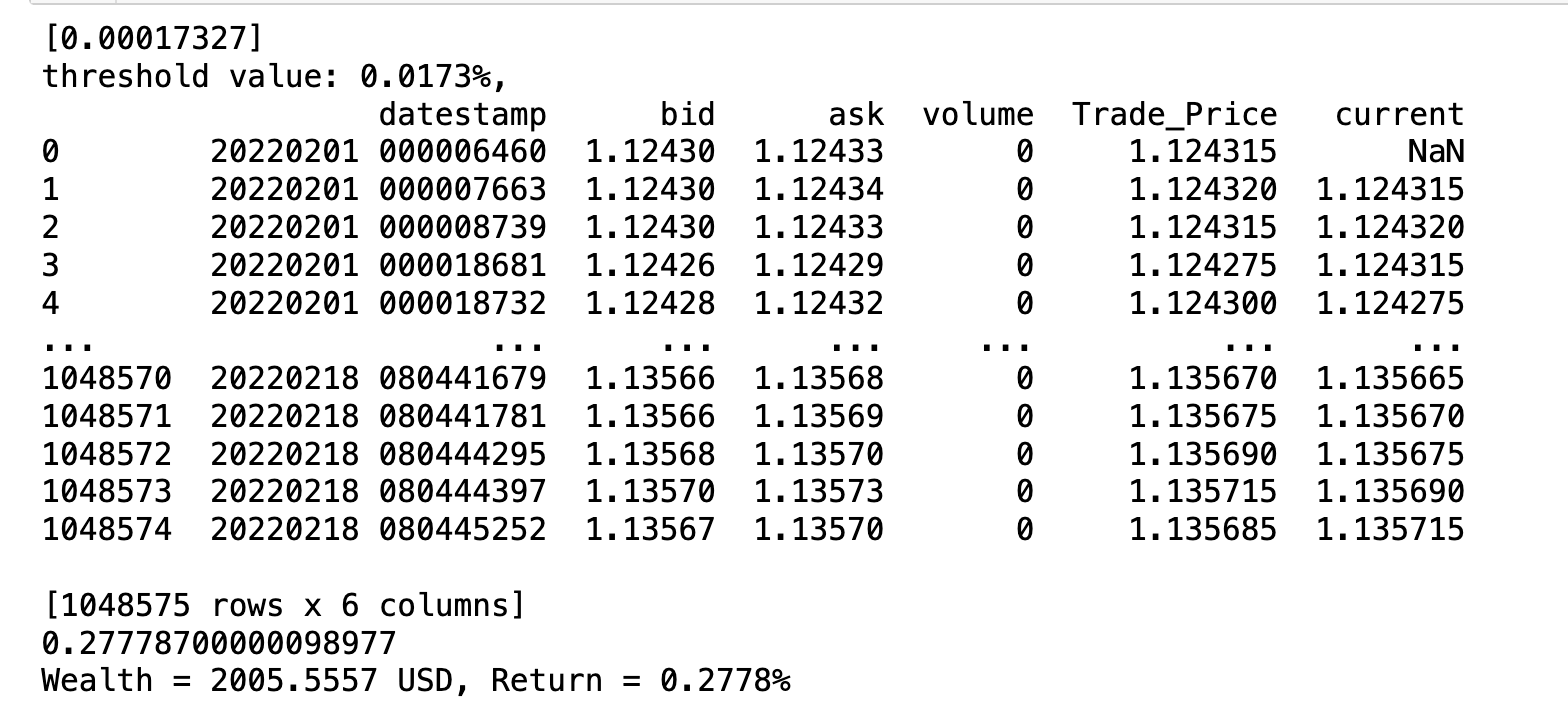

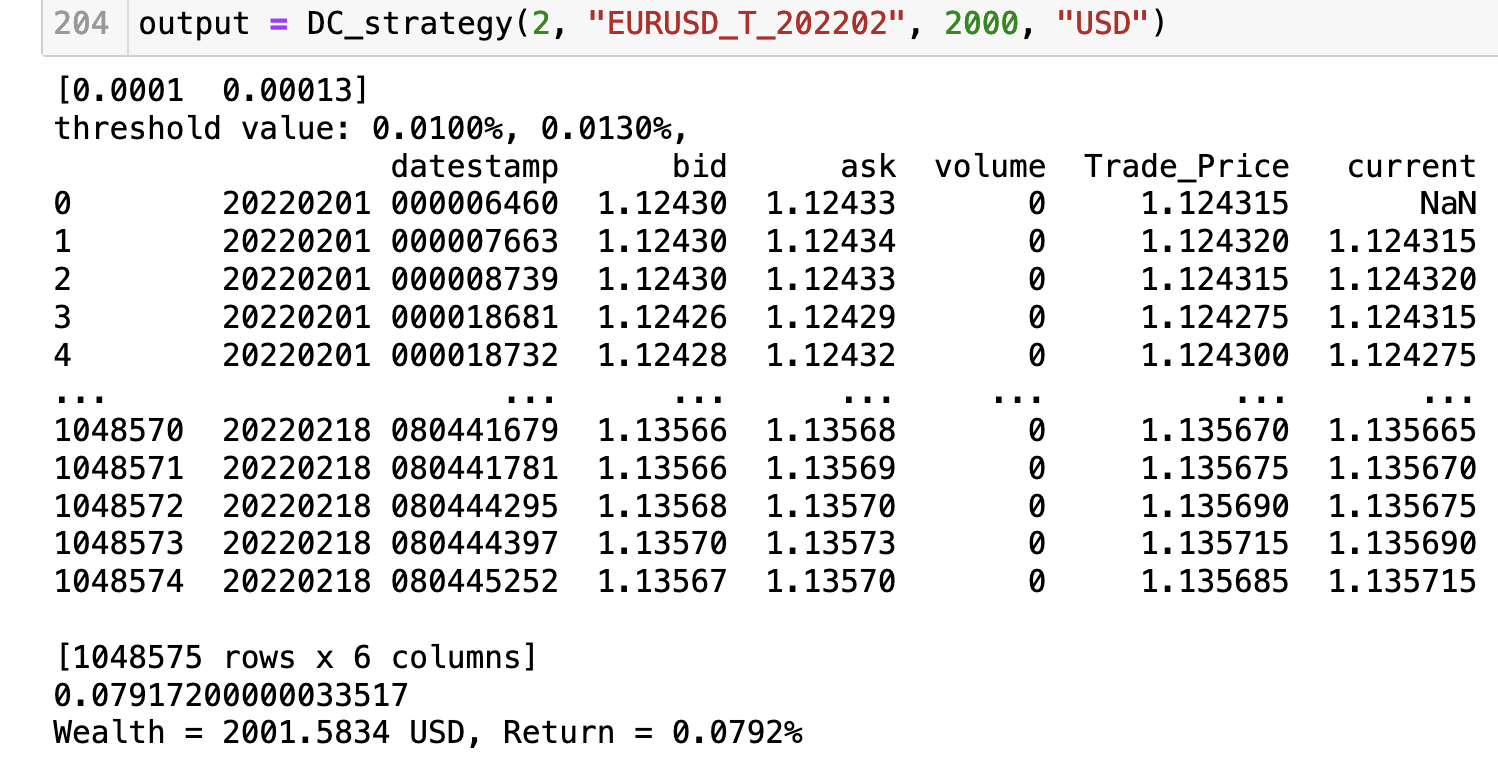

In [44]:
x = Image(filename='/Users/ambladeky/Desktop/02_random.png',width=400, height=400) 
y = Image(filename='/Users/ambladeky/Desktop/02_fixed.png',width=400, height=400) 
display(x, y)

<font size=3>
Secondly, the return of the fixed multi-thresholds strategy is much less compared to the randomly generated single threshold strategy for the monthly tick data in January, where the fixed multi-thresholds strategy only yields 0.0491%.

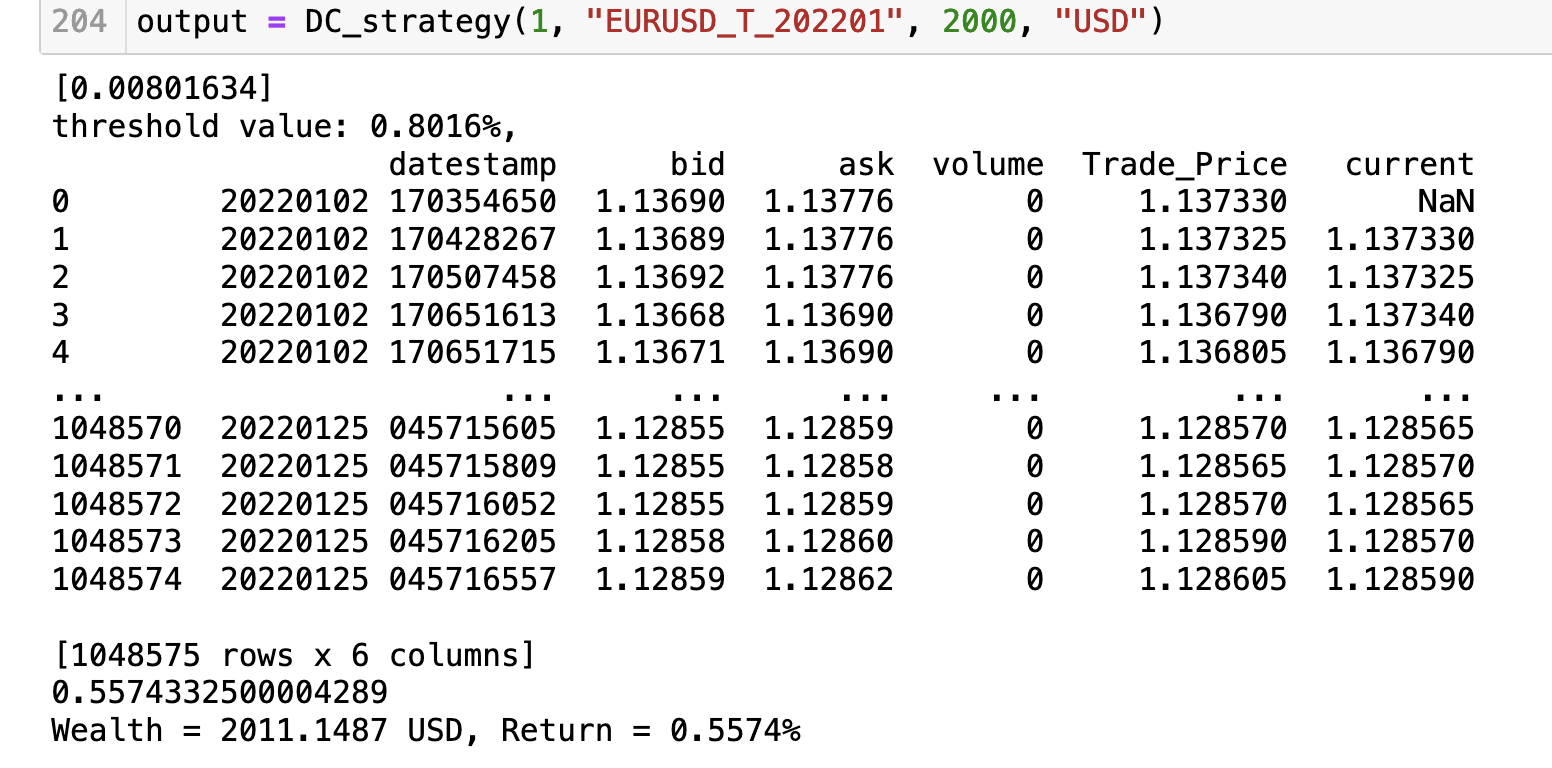

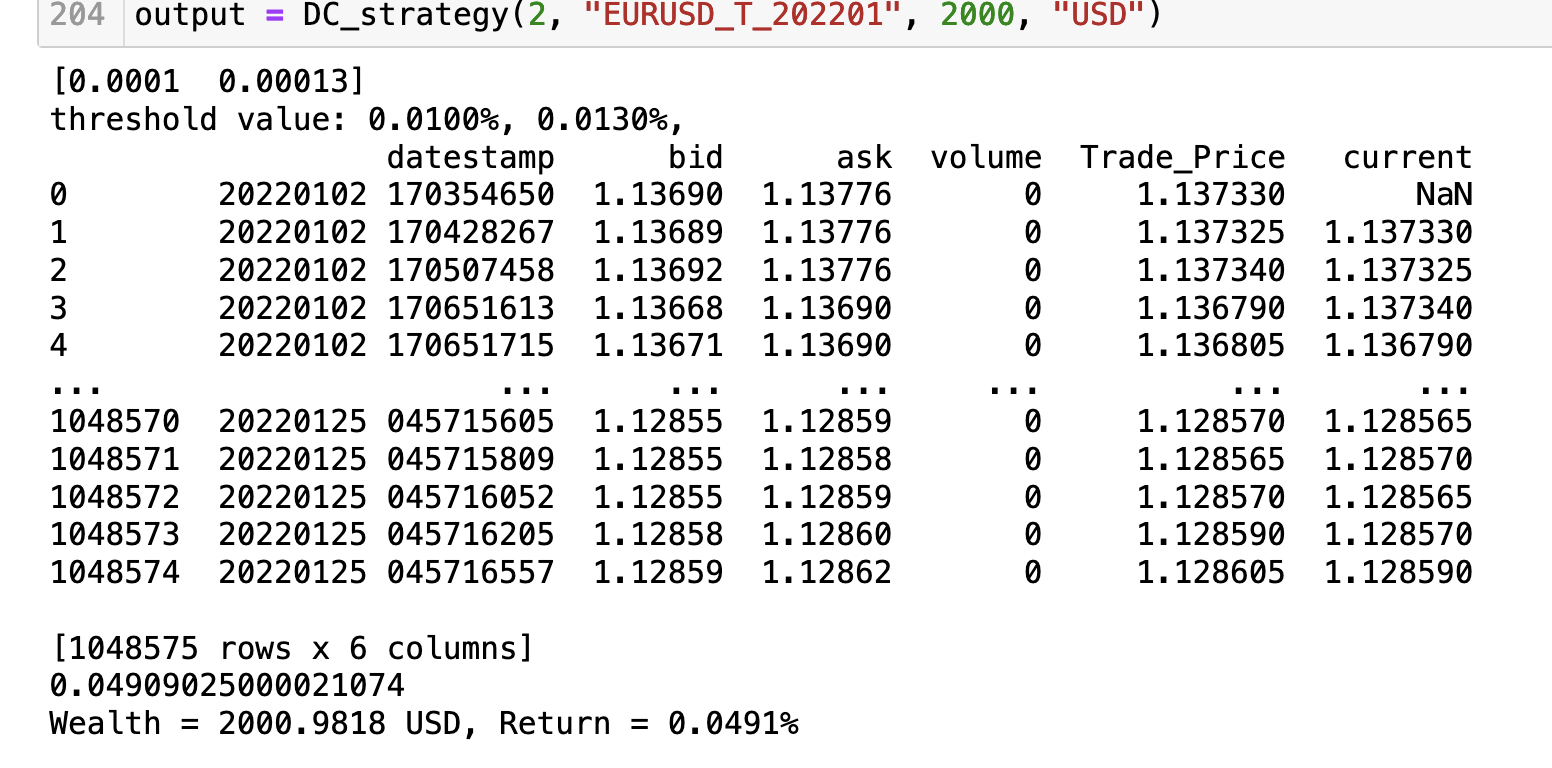

In [39]:
x = Image(filename='/Users/ambladeky/Desktop/backtest_random_01.png',width=400, height=400) 
y = Image(filename='/Users/ambladeky/Desktop/01_fixed.png',width=400, height=400) 
display(x, y)

<font size=3>
    
In the backtesting, the multi-thresholds strategy can not beat the single threshold strategy in both cases. The following part will display several reasons and improvements:

>#### [3.2] Limitation and improvement of strategy:

<font size=3>
    
Firstly, a multi-threshold trading strategy has been applied and simply assigned equal weight to each threshold. However, this is not an effective trading strategy because some thresholds may be more critical and should be assigned higher weights. 

Secondly, the four parameters: Q, $𝑏_1, 𝑏_2, 𝑏_3$ are assigned fixed values: Q = 1, $𝑏_1 = 0.8, 𝑏_2 = 1, 𝑏_3 = 0.9$. This setup is based on the observation form Kampouridis and Otero (2017). But it is not the optimal setup because these parameters are not optimized. Perhaps the Genetic algorithms can be implemented to optimize the parameters later as Tsang and Chen (2018) did.

Next, I have used the first two same threshold values 𝜃 [0.01%, 0.013%] (Kampouridis and Otero, 2017) for the data in this coursework. But the return generated is not good. It may show that threshold values 𝜃 suitable for one dataset may not be proper for other datasets. Moreover, maybe applied the whole threshold values 𝜃 [0.01%, 0.013%, 0.015%, 0.018% and 0.02%] will yield better result.
    
Lastly, the length of the OS event in this report is approximated using the scaling law. Perhaps, using the average length of tick time measured depending on the dataset will result in different returns.

#### Reference lists:

Kampouridis, M., & Otero, F. E. (2017). Evolving trading strategies using directional changes. Expert Systems with Applications, 73, 145-160.


Tsang, E., & Chen, J. (2018). Regime change detection using directional change indicators in the foreign exchange market to chart Brexit. IEEE Transactions on Emerging Topics in Computational Intelligence, 2(3), 185-193.
